<a href="https://colab.research.google.com/github/pranav168/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [74]:
from google.colab import drive                                                  #Mounting Gdrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
#Importing all the required Libraries
import numpy as np                                                              # Numpy for enabling scientific computing in Python
import pandas as pd                                                             # Pandas to Deal with the Dataset
import matplotlib.pyplot as plt                                                 #for data visualiztion
import seaborn as sns
from sklearn.metrics import mean_squared_error                                  #for calculation MSE
from sklearn.model_selection import train_test_split                            #for spliting our dataset into train and test
from sklearn.tree import DecisionTreeClassifier                                 #DecisionTreeClassifier Models
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report #metrics to calculate our model performance
import warnings                                                                 # Removing all those annoying Warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from xgboost import XGBClassifier                                               #XGBoost Model
from sklearn.model_selection import GridSearchCV                                #for Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,Normalizer,StandardScaler #For data normalization
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression        #Logistic Regression Model
from sklearn.model_selection import cross_validate
from sklearn.ensemble import IsolationForest                                    #for anomaly detection
from scipy import stats                  
from tensorflow import keras                                                    
from keras import Sequential                                                    #NN Model
from keras.layers import Dense                                                  
from sklearn.svm import SVC
!pip install colorama
from colorama import Fore
from imblearn.over_sampling import SMOTE                                        #for creating synthetic data of minority class
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [76]:
df=pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls',header=1)          #Loading the Dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [77]:
df.info()                                                                        #no Nan/null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [78]:
df.describe()                                                                   #getting the idea about numerical fields of the data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [79]:
df.drop('ID',axis=1,inplace=True)                                               #straight away removing ID as it is not at all needed as their is no advantageous relation between our lable(i.e default payment next month) and ID. 

In [80]:
df.head()                                                                       #having a peek at working data set

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [81]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [82]:
column_list=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
count_dataset=pd.DataFrame()
distinct_features=[]                                                                                          #Empty list to know the number of distict features,sum of all these values, and sum of values top 10 comprises
for i in column_list:                                                                                               
  count_dataset[i]= pd.Series(df[i].value_counts().sort_values(ascending=False).head(10).index)      
  count_dataset[f'{i}_count']=pd.Series(df[i].value_counts().sort_values(ascending=False).head(10).values).astype('int')   
  distinct_features.append((len(df[i].value_counts().index),df[i].value_counts().sum(),df[i].value_counts().sort_values(ascending=False).head(10).sum())) 
final_tally=list(zip(column_list,distinct_features))                                                           #Zipping with column_list
col_ref={}  
for i in column_list:
  if i in ['default payment next month']:                                                                    #colur red shows the Dependent Variable('default payment next month')
    col_ref[i]='background-color: red'  
  else:
    col_ref[i]='background-color: blue'                                                                       #colur blue shows the features 
  temp=f'{i}_count'
  col_ref[temp]='background-color: green'                                                                     #colur green shows the count
def Nan_as_black(val):
  if str(val)=='nan':
    color = 'black'
    return 'color: %s' % color
count_dataset=count_dataset.style.apply(lambda x: pd.DataFrame(col_ref, index=count_dataset.index, columns=count_dataset.columns).fillna(''), axis=None).highlight_null('black').applymap(Nan_as_black)
count_dataset

,LIMIT_BAL,LIMIT_BAL_count,SEX,SEX_count,EDUCATION,EDUCATION_count,MARRIAGE,MARRIAGE_count,AGE,AGE_count,PAY_0,PAY_0_count,PAY_2,PAY_2_count,PAY_3,PAY_3_count,PAY_4,PAY_4_count,PAY_5,PAY_5_count,PAY_6,PAY_6_count,BILL_AMT1,BILL_AMT1_count,BILL_AMT2,BILL_AMT2_count,BILL_AMT3,BILL_AMT3_count,BILL_AMT4,BILL_AMT4_count,BILL_AMT5,BILL_AMT5_count,BILL_AMT6,BILL_AMT6_count,PAY_AMT1,PAY_AMT1_count,PAY_AMT2,PAY_AMT2_count,PAY_AMT3,PAY_AMT3_count,PAY_AMT4,PAY_AMT4_count,PAY_AMT5,PAY_AMT5_count,PAY_AMT6,PAY_AMT6_count,default payment next month,default payment next month_count
0,50000,3365,2.000000,18112.000000,2.000000,14030.000000,2.000000,15964.000000,29,1605,0,14737,0,15730,0,15764,0,16455,0,16947,0,16286,0,2008,0,2506,0,2870,0,3195,0,3506,0,4020,0,5249,0,5396,0,5968,0,6408,0,6703,0,7173,0.000000,23364.000000
1,20000,1976,1.000000,11888.000000,1.000000,10585.000000,1.000000,13659.000000,27,1477,-1,5686,-1,6050,-1,5938,-1,5687,-1,5539,-1,5740,390,244,390,231,390,275,390,246,390,235,390,207,2000,1363,2000,1290,2000,1285,1000,1394,1000,1340,1000,1299,1.000000,6636.000000
2,30000,1610,nan,nan,3.000000,4917.000000,3.000000,323.000000,28,1409,1,3688,2,3927,-2,4085,-2,4348,-2,4546,-2,4895,780,76,326,75,780,74,780,101,780,94,780,86,3000,891,3000,857,1000,1103,2000,1214,2000,1323,2000,1295,nan,nan
3,80000,1567,nan,nan,5.000000,280.000000,0.000000,54.000000,30,1395,-2,2759,-2,3782,2,3819,2,3159,2,2626,2,2766,326,72,780,75,326,63,316,68,316,79,150,78,5000,698,5000,717,3000,870,3000,887,3000,947,3000,914,nan,nan
4,200000,1528,nan,nan,4.000000,123.000000,nan,nan,26,1256,2,2667,3,326,3,240,3,180,3,178,3,184,316,63,316,72,316,62,326,62,326,62,316,77,1500,507,1000,594,5000,721,5000,810,5000,814,5000,808,nan,nan
5,150000,1110,nan,nan,6.000000,51.000000,nan,nan,31,1217,3,322,4,99,4,76,4,69,4,84,4,49,2500,59,2500,51,396,48,396,44,150,58,326,56,4000,426,1500,521,1500,490,1500,441,1500,426,1500,439,nan,nan
6,100000,1048,nan,nan,0.000000,14.000000,nan,nan,25,1186,4,76,1,28,7,27,7,58,7,58,7,46,396,49,396,51,2500,40,2400,39,396,47,396,45,10000,401,4000,410,4000,381,4000,402,4000,401,4000,411,nan,nan
7,180000,995,nan,nan,nan,nan,nan,nan,34,1162,5,26,5,25,6,23,5,35,5,17,6,19,2400,39,2400,42,2400,39,150,39,2400,39,416,36,1000,365,10000,318,10000,312,10000,341,10000,343,10000,356,nan,nan
8,360000,881,nan,nan,nan,nan,nan,nan,32,1158,8,19,7,20,5,21,6,5,6,4,5,13,416,29,-200,29,416,29,2500,34,2500,37,-18,33,2500,298,6000,283,1200,243,2500,259,500,250,500,247,nan,nan
9,60000,825,nan,nan,nan,nan,nan,nan,33,1146,6,11,6,12,1,4,1,2,8,1,8,2,500,25,416,28,200,27,1000,33,416,36,2400,32,6000,294,2500,251,6000,241,500,258,6000,247,6000,220,nan,nan


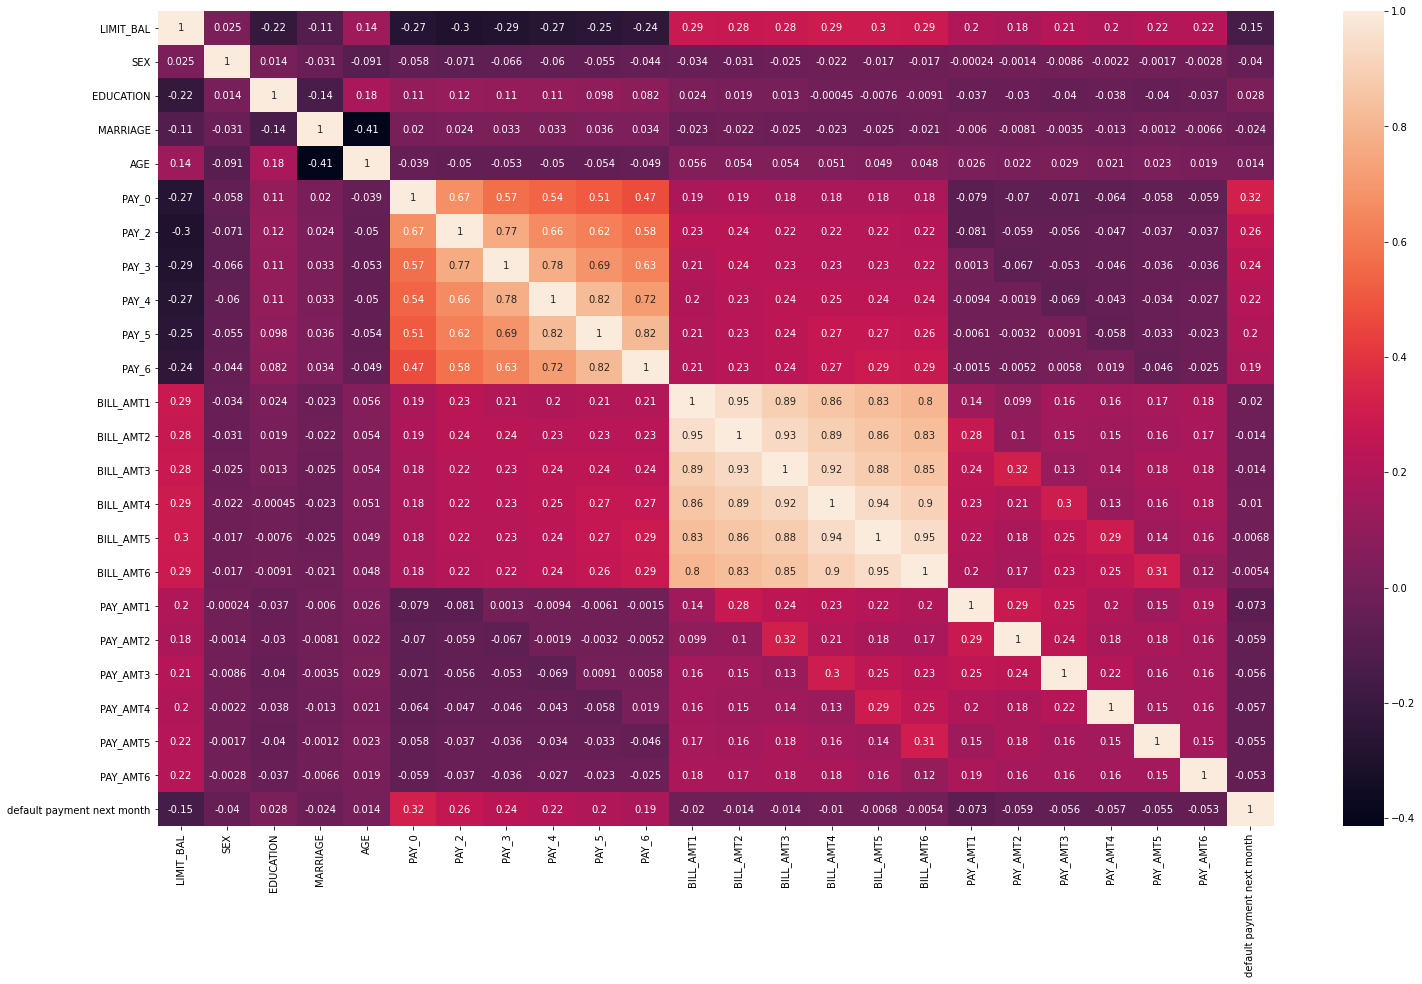

In [83]:
corr = df.corr()                                                                #plotting co-relation chart
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True)
plt.show()                                      

few features are highly correlated to each other, well settle this multicollinearity later when dealing with models which are not immune to it

also we can see that correlation between our label and features is not that great especially for certain features like bill_amt's, pay_amt's , sex, marriage and age. this is actually a matter of concern!!

In [84]:
df_default=df[df['default payment next month']==1]                              #Making a Dataset only for the defaulters for data visualization purpose

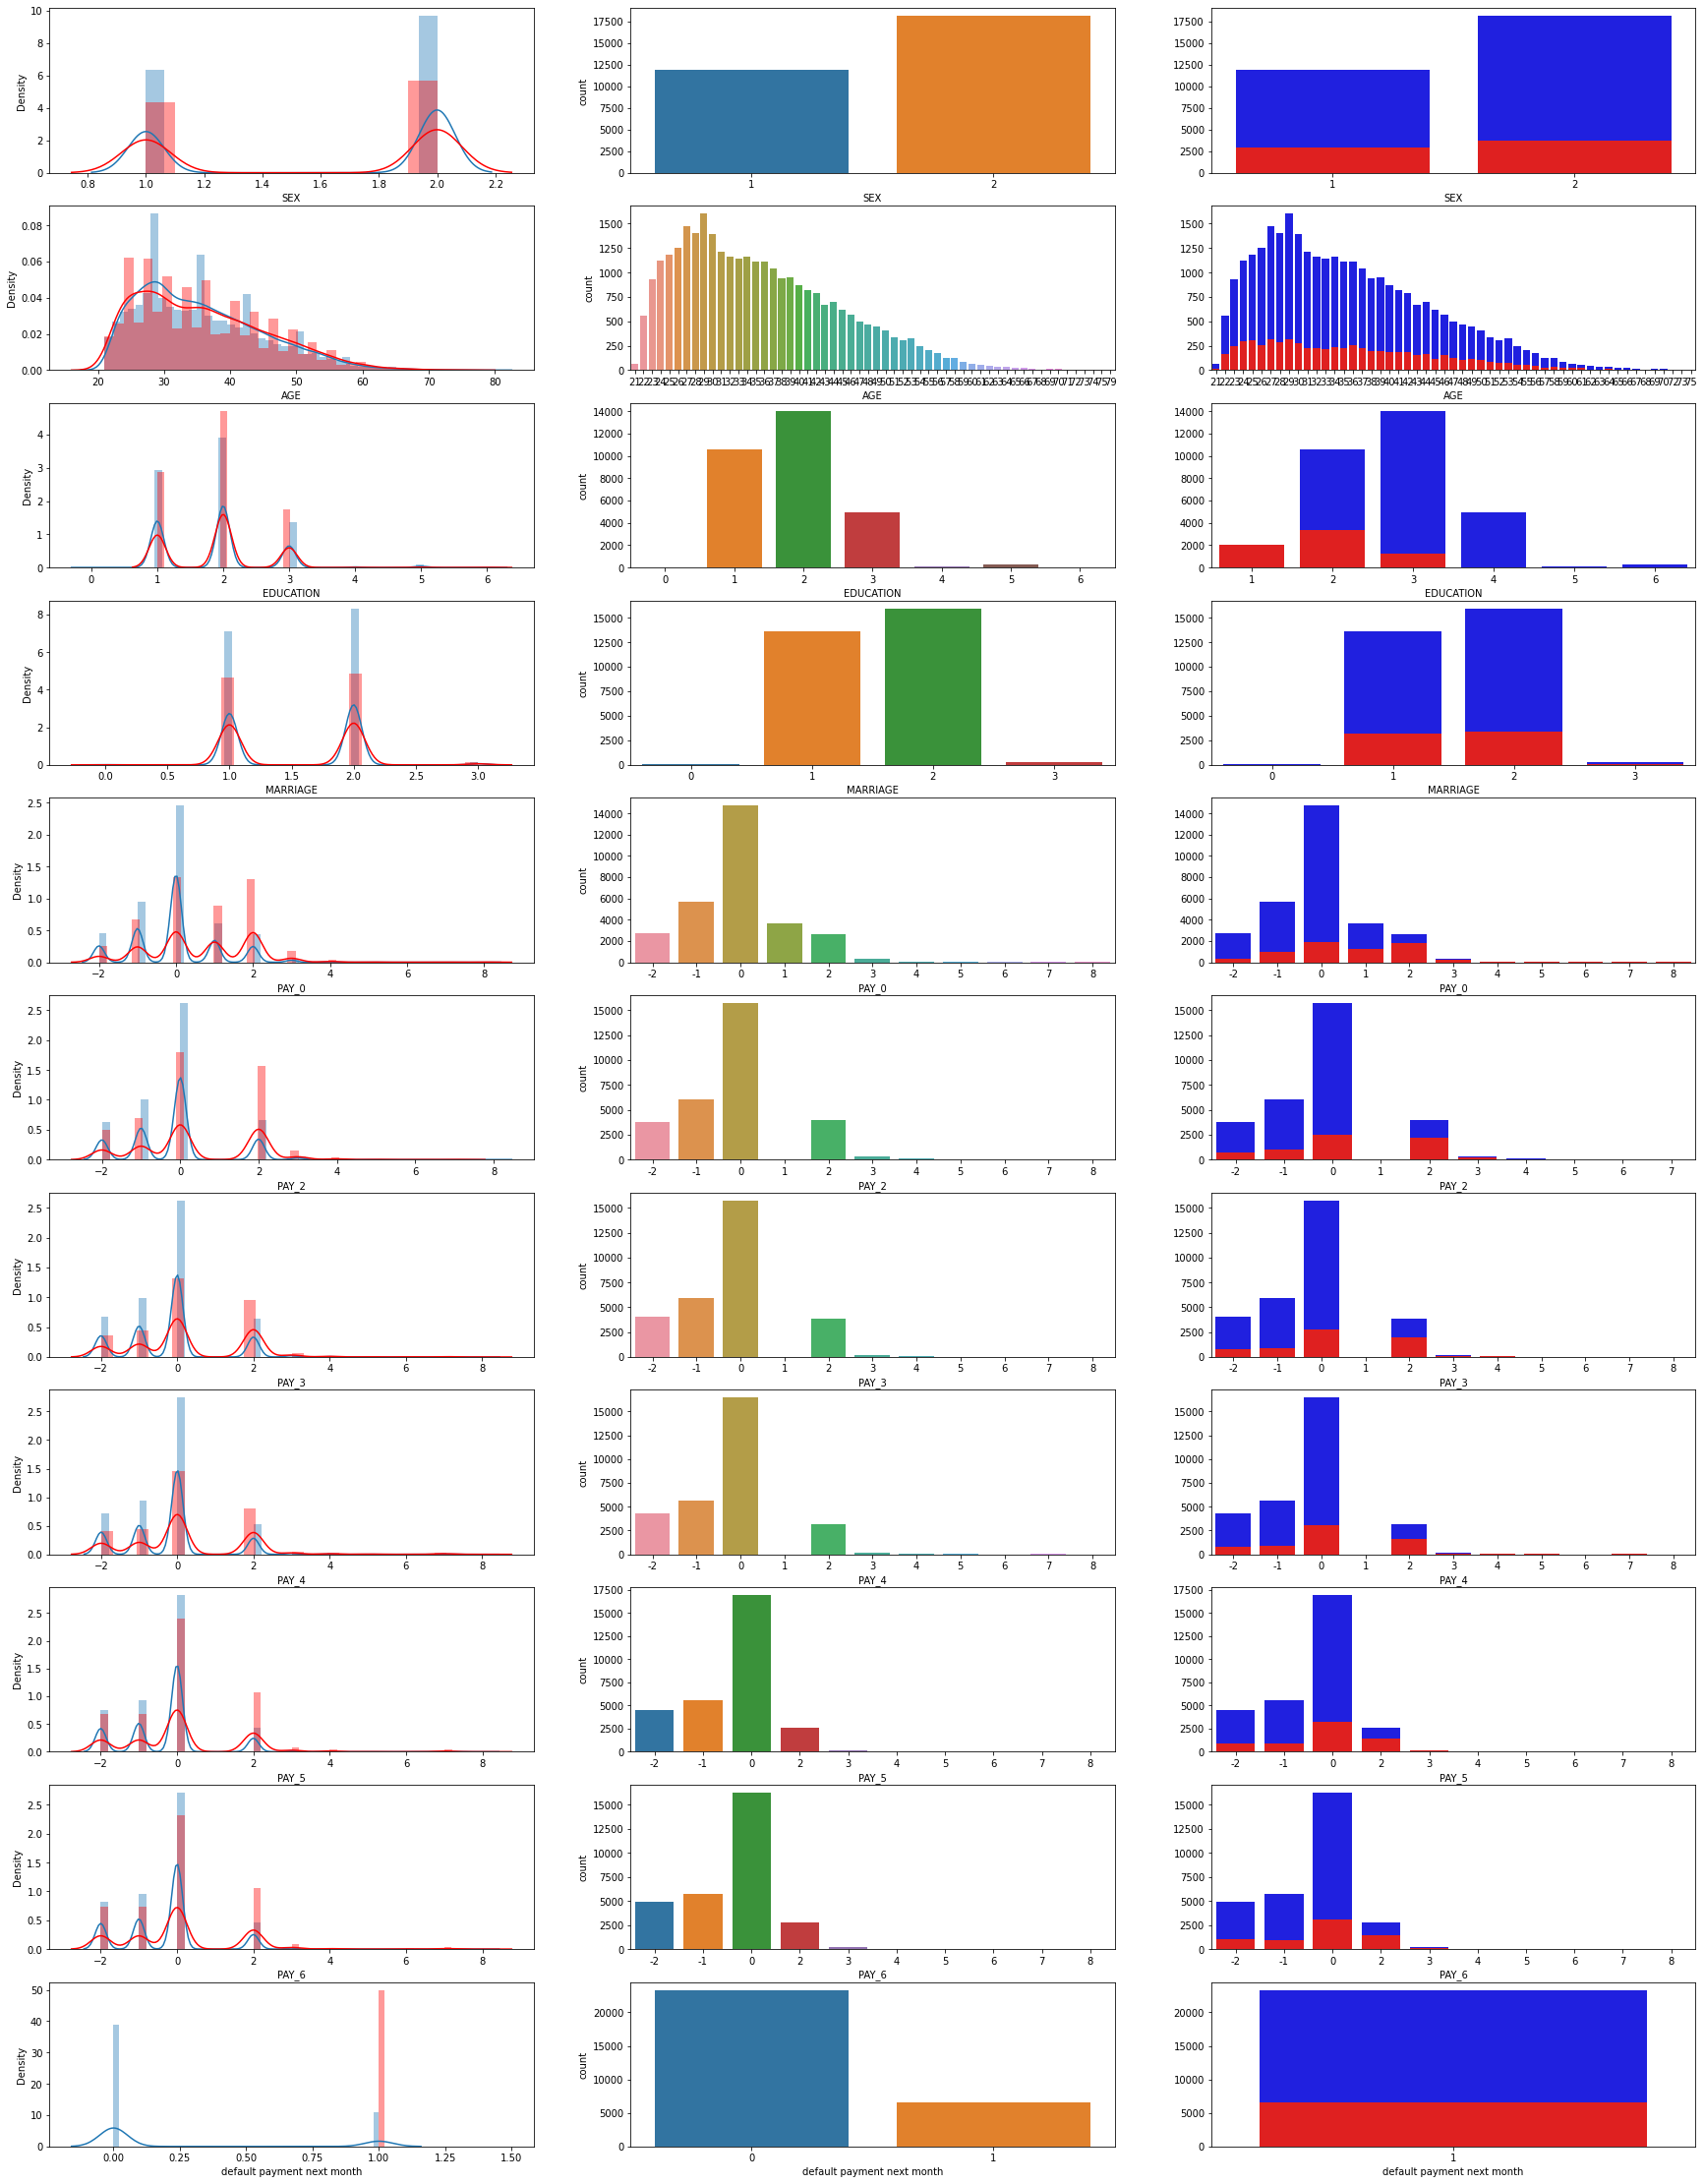

In [85]:
columns = ['SEX','AGE', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default payment next month']
fig, axs = plt.subplots(len(columns),3,figsize=(30,40))
count=0
for i in columns:
    sns.distplot(df[i],ax=axs[count,0])                                         #shows the overall distribution 
    sns.distplot(df_default[i],ax=axs[count,0],color='r')                       #shows the distribution of defaulters
    count+=1
count=0
for i in columns:
    sns.countplot(df[i],ax=axs[count,1])
    count+=1
counter=0
for i in columns:
  temp=df.groupby(i)['default payment next month'].count()
  temp2=df_default.groupby(i)['default payment next month'].count() 
  sns.barplot(temp.index,temp.values,ax=axs[counter,2],color='b')               #Blue Colour represents Data for both Defaulters and non-Defaulters
  sns.barplot(temp2.index,temp2.values,color='r',ax=axs[counter,2])             ##Red color represents the Defaulters
  counter+=1



Loads of interpretations can be formed by looking at above charts:


1.   Column 1 shows the distributions of all the values in blue and defaulters in red
2.   Column 2 shows the counts of all the values &
3.    Column 3 shows the count plot of Defaulte











Lets do a Anomaly detection now, the most correlated feature with our label is PAY_0 and similar others which actually is quite logical for this prediction and thus we will use this relation to find anomalies. (here anomalies signifies to person who are very punctual but have been defaulter because of certain unavoidable reasons and vice-versa)

In [86]:
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(df[['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default payment next month']])
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)     #Isolation Forest algorithm for anomaly detection
clf.fit(X)

df['multivariate_anomaly_score'] = clf.decision_function(X)                     # predict raw anomaly score
df['multivariate_outlier'] = clf.predict(X)                                     # prediction of a datapoint category outlier or inlier
df2=df


In [87]:
df=df[df.multivariate_outlier==1]                                               #updating data
print(df.shape)  #outliers have been removed
df.drop(['multivariate_anomaly_score','multivariate_outlier'],axis=1,inplace=True)

(29700, 26)


In [88]:
df_one_hot=pd.DataFrame()

In [89]:
one_hot_entity=['Pay_september','Pay_august','Pay_july','Pay_june','Pay_may','Pay_april']    
column_one_hot=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']                # one hot encoding 
count=0
for i in column_one_hot:
  temp_df=pd.get_dummies(df[i], prefix=one_hot_entity[count])
  count+=1
  try:
    df_one_hot=pd.concat([df_one_hot, temp_df], axis=1)
  except:
    df_one_hot=temp_df
df_one_hot.head()

,Pay_september_-2,Pay_september_-1,Pay_september_0,Pay_september_1,Pay_september_2,Pay_september_3,Pay_september_4,Pay_august_-2,Pay_august_-1,Pay_august_0,Pay_august_1,Pay_august_2,Pay_august_3,Pay_august_4,Pay_july_-2,Pay_july_-1,Pay_july_0,Pay_july_1,Pay_july_2,Pay_july_3,Pay_july_4,Pay_june_-2,Pay_june_-1,Pay_june_0,Pay_june_1,Pay_june_2,Pay_june_3,Pay_june_4,Pay_may_-2,Pay_may_-1,Pay_may_0,Pay_may_2,Pay_may_3,Pay_may_4,Pay_april_-2,Pay_april_-1,Pay_april_0,Pay_april_2,Pay_april_3,Pay_april_4,Pay_april_5,Pay_april_6
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [90]:
df=pd.concat([df,df_one_hot], axis=1)

In [91]:
df.drop(column_one_hot,axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Pay_september_-2,Pay_september_-1,Pay_september_0,Pay_september_1,Pay_september_2,Pay_september_3,Pay_september_4,Pay_august_-2,Pay_august_-1,Pay_august_0,Pay_august_1,Pay_august_2,Pay_august_3,Pay_august_4,Pay_july_-2,Pay_july_-1,Pay_july_0,Pay_july_1,Pay_july_2,Pay_july_3,Pay_july_4,Pay_june_-2,Pay_june_-1,Pay_june_0,Pay_june_1,Pay_june_2,Pay_june_3,Pay_june_4,Pay_may_-2,Pay_may_-1,Pay_may_0,Pay_may_2,Pay_may_3,Pay_may_4,Pay_april_-2,Pay_april_-1,Pay_april_0,Pay_april_2,Pay_april_3,Pay_april_4,Pay_april_5,Pay_april_6
0,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


#DecisionTree, RandomForest and XGBoost

In [92]:
X = df.drop(["default payment next month"],axis =1 )                            #making Final Datasets
y = df["default payment next month"]

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=0) #train test split

In [94]:
def DecisionTreePrediction(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,max_depth=3,prediction=False,feature_plot=False,visuals=False): 
  '''
  Apply DecisionTree model on dataset to return the predicted values of test_set
  Takes input :
  For training model:
  X_train: astype numpy_array or pandas.core.frame.DataFrame, 
          contains features of Training set y_train: astype numpy_array, 
          contain lables of Training set
  For testing model performance:
  X_test: astype numpy_array or pandas.core.frame.DataFrame,
          contains features of Test set for which predictions are to be made
  y_test: astype numpy_array or pandas.core.frame.DataFrame,contains lables of 
          Training set for accuracy prediction
  max_depth: astype int, maximum depth of decision tree
  prediction: astype Boolean, if True returns predictions for X_test
  '''
  from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
  model= DecisionTreeClassifier(random_state=0,max_depth=max_depth)              #defining model
  model.fit(X_train,y_train)                                                     #training model
  y_pred_test=model.predict(X_test)                                              #predicting test_dataset
  y_pred_train=model.predict(X_train)
  mse=mean_squared_error(y_test,y_pred_test)                                     #calculating mean-square-error
  accuracy_test=accuracy_score(y_test,y_pred_test)                               #calculating accuracy
  accuracy_train=accuracy_score(y_train,y_pred_train)
  cm=confusion_matrix(y_test,y_pred_test)
  classificationReport=classification_report(y_test,y_pred_test,target_names=['Non-Defaulter', 'Defaulter'])
  if feature_plot==True:                                                                         
      important_Feature=pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
      plt.figure(figsize=(25,10))
      sns.barplot(important_Feature.index,important_Feature.values)
      plt.xticks(rotation=90)
      print(plt.show)
  if prediction==True:
      print(y_pred_test)
  if visuals==True:
    from sklearn.tree import export_graphviz
    from sklearn import tree
    from IPython.display import SVG
    from graphviz import Source
    from IPython.display import display
    graph = Source(tree.export_graphviz(model, out_file=None
      , feature_names=X_train.columns, class_names=['0', '1'] 
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
  return f'At max_depth ={ max_depth}: MSE = {mse}, Accuracy Score for Train Samples ={round(accuracy_train,4)*100}% and Accuracy Score for Test Samples ={round(accuracy_test,4)*100}% {print(Fore.RED+classificationReport+Fore.BLUE)}'


In [95]:
max_depth=[3,5,7,10,12]                                                         #Checking for Various depths
for i in max_depth:
  print(DecisionTreePrediction(X_train,y_train,X_test,y_test,i,False,))

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.97      0.90      4692
    Defaulter       0.71      0.30      0.42      1248

     accuracy                           0.83      5940
    macro avg       0.78      0.63      0.66      5940
 weighted avg       0.81      0.83      0.80      5940

At max_depth =3: MSE = 0.17255892255892255, Accuracy Score for Train Samples =81.98% and Accuracy Score for Test Samples =82.74000000000001% None
               precision    recall  f1-score   support

Non-Defaulter       0.84      0.96      0.90      4692
    Defaulter       0.69      0.33      0.44      1248

     accuracy                           0.83      5940
    macro avg       0.77      0.64      0.67      5940
 weighted avg       0.81      0.83      0.80      5940

At max_depth =5: MSE = 0.17222222222222222, Accuracy Score for Train Samples =82.42% and Accuracy Score for Test Samples =82.78% None
               precision    recall  f1-score   support

Max Accuracy using Decision Tree is 83.03%

<function show at 0x7fda87c5fe60>


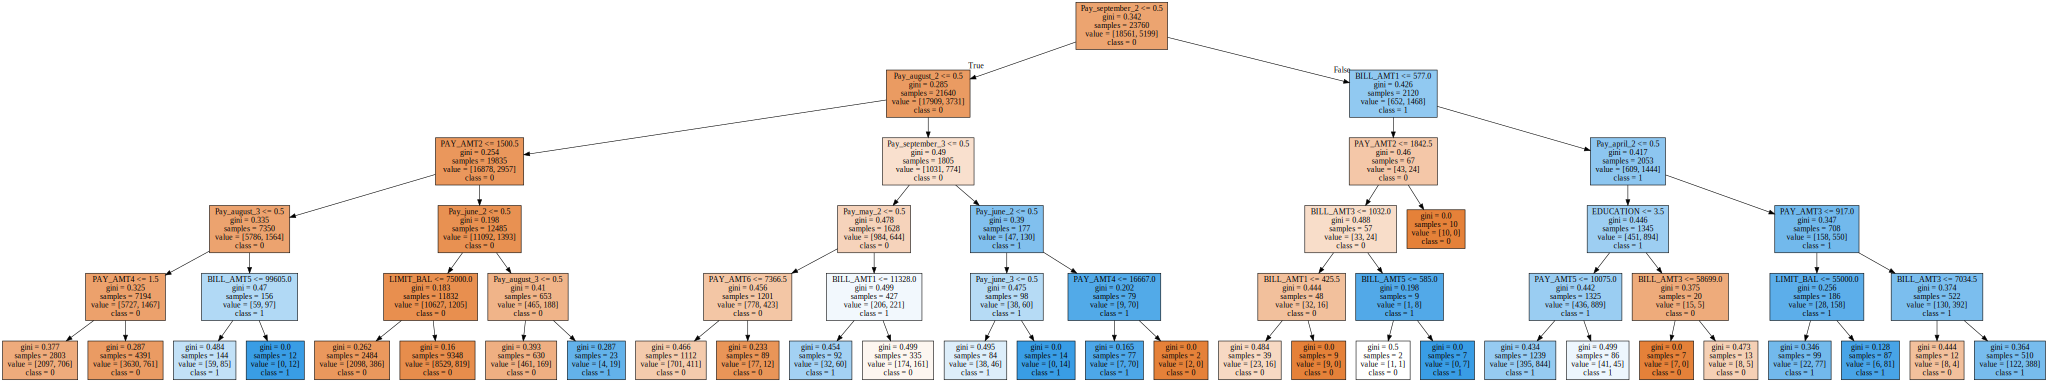

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.96      0.90      4692
    Defaulter       0.69      0.33      0.44      1248

     accuracy                           0.83      5940
    macro avg       0.77      0.64      0.67      5940
 weighted avg       0.81      0.83      0.80      5940



'At max_depth =5: MSE = 0.17222222222222222, Accuracy Score for Train Samples =82.42% and Accuracy Score for Test Samples =82.78% None'

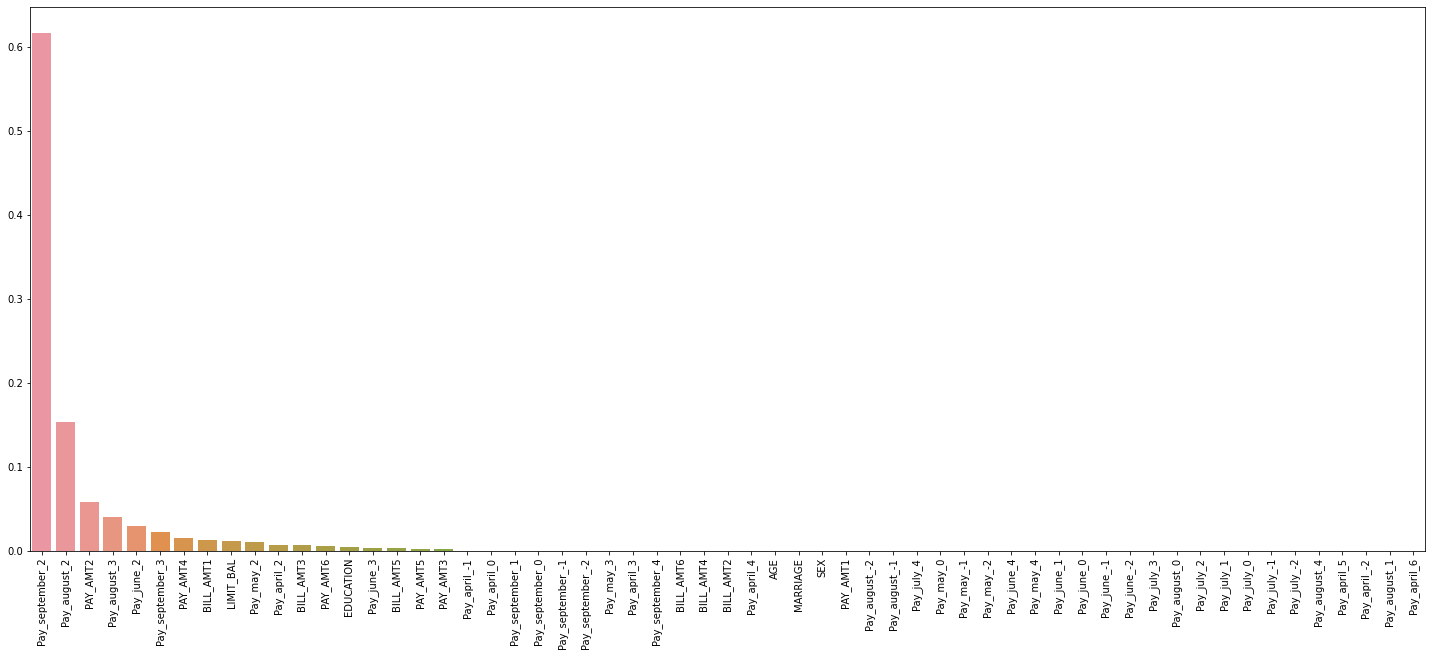

In [96]:
DecisionTreePrediction(X_train,y_train,X_test,y_test,5,False,True,True)         #for max depth 3, i am running the model to get some visuals of tree and feature importance chart

This Graph is very intrutive, it is clear now that most important feature in  deciding that person in Defaulter or not is the status of his past month credit card bill payment.




In [97]:
model=XGBClassifier()                                                           #XGBoost
n_estimators = [5,10,20,50,100]
max_depth = [3,4,5,6,7]
param_grid = dict(max_depth=max_depth,n_estimators=n_estimators)                                          
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)   
# summarize results
print(Fore.RED+"Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)+Fore.BLUE)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.426854 using {'max_depth': 4, 'n_estimators': 100}
-0.546487 (0.001601) with: {'max_depth': 3, 'n_estimators': 5}
-0.486205 (0.002527) with: {'max_depth': 3, 'n_estimators': 10}
-0.446038 (0.003566) with: {'max_depth': 3, 'n_estimators': 20}
-0.429776 (0.004207) with: {'max_depth': 3, 'n_estimators': 50}
-0.427063 (0.004910) with: {'max_depth': 3, 'n_estimators': 100}
-0.543766 (0.002031) with: {'max_depth': 4, 'n_estimators': 5}
-0.482221 (0.002863) with: {'max_depth': 4, 'n_estimators': 10}
-0.442289 (0.004002) with: {'max_depth': 4, 'n_estimators': 20}
-0.428011 (0.004783) with: {'max_depth': 4, 'n_estimators': 50}
-0.426854 (0.005800) with: {'max_depth': 4, 'n_estimators': 100}
-0.542231 (0.001891) with: {'max_depth': 5, 'n_estimators': 5}
-0.480168 (0.002719) with: {'max_depth': 5, 'n_estimators': 10}
-0.440216 (0.003924) with: {'max_depth': 5, 'n_estimators': 20}
-0.426996 (0.005150) with: {'max_depth': 5, 'n_estimators': 50}
-0.427352 (0.005739) with: {'max_depth': 5, '

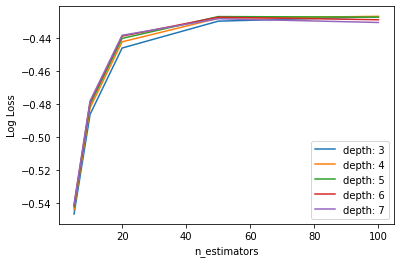

In [98]:
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')   

In [99]:
model2=XGBClassifier(max_depth=4,n_estimators=100)
model2.fit(X_train,y_train)
y_pred_test2=model2.predict(X_test)                                              
y_pred_train2=model2.predict(X_train)
y_pred_test_prob=model2.predict_proba(X_test)                                   # will be used for KS Chart Calculation
mse2=mean_squared_error(y_test,y_pred_test2)                                    
accuracy_test2=accuracy_score(y_test,y_pred_test2)                              
accuracy_train2=accuracy_score(y_train,y_pred_train2)
print(Fore.BLUE+f'MSE = {mse2}, Accuracy Score for Train Samples ={round(accuracy_train2,3)} and Accuracy Score for Test Samples ={round(accuracy_test2,3)}') 

MSE = 0.17053872053872055, Accuracy Score for Train Samples =0.83 and Accuracy Score for Test Samples =0.829


<function matplotlib.pyplot.show>

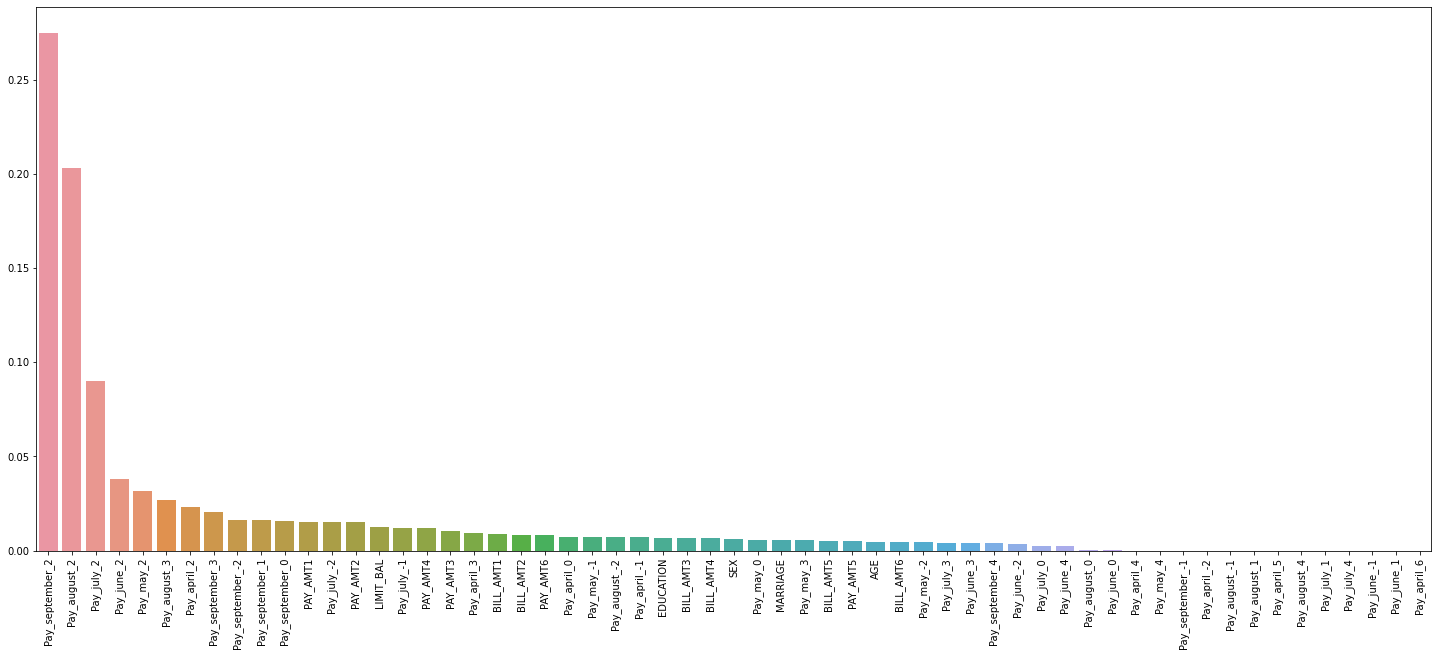

In [100]:
important_Feature=pd.Series(model2.feature_importances_, X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(important_Feature.index,important_Feature.values)
plt.xticks(rotation=90)
plt.show

[Text(0, 0.5, 'Non-Defaulter'), Text(0, 1.5, 'Defaulter')]

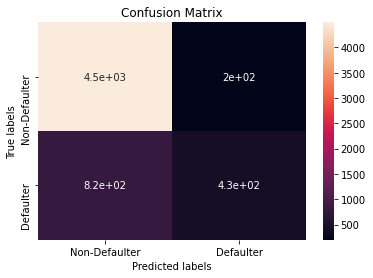

In [101]:
labels = ['Non-Defaulter', 'Defaulter']
cm_test = confusion_matrix(y_test, y_pred_test2)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [102]:
print(Fore.RED+classification_report(y_test,y_pred_test2,target_names=['Non-Defaulter', 'Defaulter']))

               precision    recall  f1-score   support

Non-Defaulter       0.85      0.96      0.90      4692
    Defaulter       0.69      0.35      0.46      1248

     accuracy                           0.83      5940
    macro avg       0.77      0.65      0.68      5940
 weighted avg       0.81      0.83      0.81      5940



MSE = 0.17037037037037037, Accuracy Score for Train Samples =0.9993265993265993 and Accuracy Score for Test Samples =0.8296296296296296 for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4692
           1       0.68      0.36      0.47      1248

    accuracy                           0.83      5940
   macro avg       0.76      0.66      0.69      5940
weighted avg       0.81      0.83      0.81      5940

[[4473  219]
 [ 793  455]]


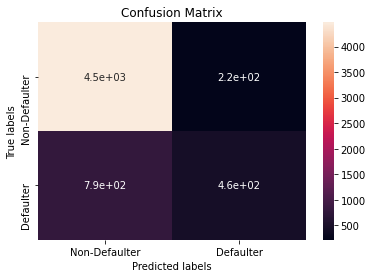

<function matplotlib.pyplot.show>

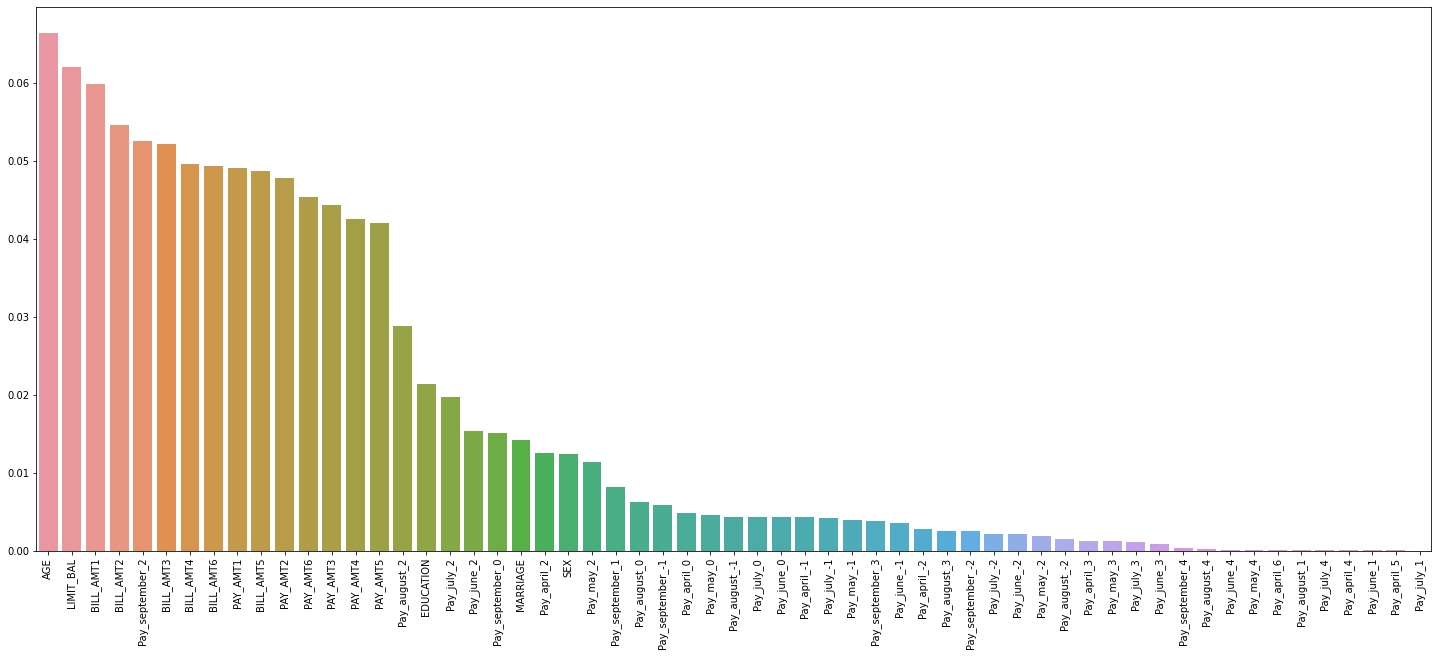

In [103]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
accuracy_score_test=accuracy_score(y_test,y_pred_test)
accuracy_score_train=accuracy_score(y_train,y_pred_train)
mse=mean_squared_error(y_test,y_pred_test) 
print(f'MSE = {mse}, Accuracy Score for Train Samples ={accuracy_score_train} and Accuracy Score for Test Samples ={accuracy_score_test} for Random Forest Classifier')
print(classification_report(y_test,y_pred_test))
labels = ['Non-Defaulter', 'Defaulter']
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
important_Feature=pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(important_Feature.index,important_Feature.values)
plt.xticks(rotation=90)
plt.show

Thus using XGBoost Best result i could get is MSE:

*    MSE = 0.16818181818181818, Accuracy Score for Train Samples =0.829 and Accuracy Score for Test Samples =0.832
*  but the condition of F1 score for Default prediction is really bad due to class imbalance lets try to solve it.


#Trying Oversampling Technique (SMOTE)


In [104]:
oversample = SMOTE() #usnig oversampling technique to create synthetic data and deal with class inbalance
X, y = oversample.fit_resample(X, y)

In [105]:
X

array([[ 20000,      2,      2, ...,      0,      0,      0],
       [120000,      2,      2, ...,      0,      0,      0],
       [ 90000,      2,      2, ...,      0,      0,      0],
       ...,
       [100000,      1,      1, ...,      0,      0,      0],
       [519989,      1,      1, ...,      0,      0,      0],
       [210000,      2,      1, ...,      0,      0,      0]])

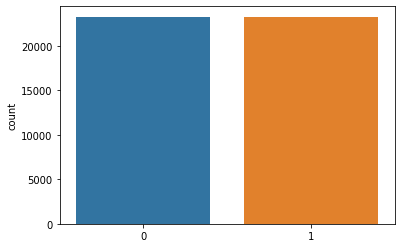

In [106]:
sns.countplot(y)

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=0) #train test split

In [108]:
DecisionTreePrediction()

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.97      0.90      4692
    Defaulter       0.71      0.30      0.42      1248

     accuracy                           0.83      5940
    macro avg       0.78      0.63      0.66      5940
 weighted avg       0.81      0.83      0.80      5940



'At max_depth =3: MSE = 0.17255892255892255, Accuracy Score for Train Samples =81.98% and Accuracy Score for Test Samples =82.74000000000001% None'

In [119]:
model=XGBClassifier() #XGBoost
n_estimators = [150,200,300]
max_depth = [10,12,14]
param_grid = dict(max_depth=max_depth,n_estimators=n_estimators)                                          
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)   
# summarize results
print(Fore.RED+"Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)+Fore.BLUE)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.323361 using {'max_depth': 10, 'n_estimators': 150}
-0.323361 (0.004348) with: {'max_depth': 10, 'n_estimators': 150}
-0.325541 (0.004132) with: {'max_depth': 10, 'n_estimators': 200}
-0.333652 (0.004970) with: {'max_depth': 10, 'n_estimators': 300}
-0.327499 (0.003530) with: {'max_depth': 12, 'n_estimators': 150}
-0.333287 (0.003474) with: {'max_depth': 12, 'n_estimators': 200}
-0.345698 (0.003702) with: {'max_depth': 12, 'n_estimators': 300}
-0.335709 (0.003554) with: {'max_depth': 14, 'n_estimators': 150}
-0.343967 (0.003430) with: {'max_depth': 14, 'n_estimators': 200}
-0.358107 (0.003192) with: {'max_depth': 14, 'n_estimators': 300}


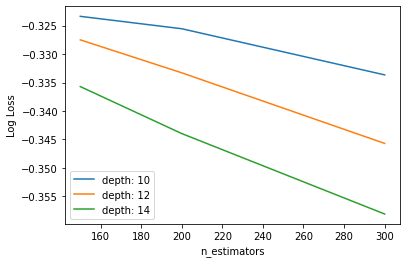

In [120]:
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')   

In [121]:
model2=XGBClassifier(max_depth=10,n_estimators=150)
model2.fit(X_train,y_train)
y_pred_test2=model2.predict(X_test)                                              
y_pred_train2=model2.predict(X_train)
y_pred_test_prob=model2.predict_proba(X_test)                                   # will be used for KS Chart Calculation
mse2=mean_squared_error(y_test,y_pred_test2)                                    
accuracy_test2=accuracy_score(y_test,y_pred_test2)                              
accuracy_train2=accuracy_score(y_train,y_pred_train2)
print(Fore.BLUE+f'MSE = {mse2}, Accuracy Score for Train Samples ={round(accuracy_train2,3)} and Accuracy Score for Test Samples ={round(accuracy_test2,3)}') 

MSE = 0.1283594925822404, Accuracy Score for Train Samples =0.976 and Accuracy Score for Test Samples =0.872


[[4250  363]
 [ 831 3858]]


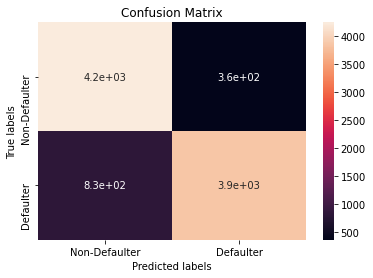

In [122]:
labels = ['Non-Defaulter', 'Defaulter']
cm_test = confusion_matrix(y_test, y_pred_test2)
print(cm_test)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [123]:
print(Fore.RED+classification_report(y_test,y_pred_test2,target_names=['Non-Defaulter', 'Defaulter']))

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.92      0.88      4613
    Defaulter       0.91      0.82      0.87      4689

     accuracy                           0.87      9302
    macro avg       0.88      0.87      0.87      9302
 weighted avg       0.88      0.87      0.87      9302



MSE = 0.12438185336486778, Accuracy Score for Train Samples =0.9993549080744006 and Accuracy Score for Test Samples =0.8756181466351323 for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4613
           1       0.92      0.83      0.87      4689

    accuracy                           0.88      9302
   macro avg       0.88      0.88      0.88      9302
weighted avg       0.88      0.88      0.88      9302

[[4259  354]
 [ 803 3886]]


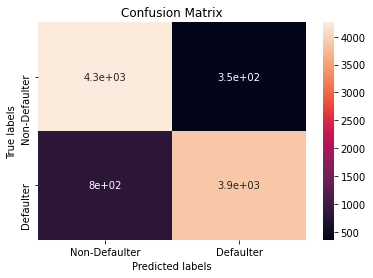

In [124]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_test_rf=model.predict(X_test)
y_pred_train=model.predict(X_train)
accuracy_score_test=accuracy_score(y_test,y_pred_test_rf)
accuracy_score_train=accuracy_score(y_train,y_pred_train)
y_pred_test_prob_rf=model2.predict_proba(X_test)    
mse=mean_squared_error(y_test,y_pred_test_rf) 
print(f'MSE = {mse}, Accuracy Score for Train Samples ={accuracy_score_train} and Accuracy Score for Test Samples ={accuracy_score_test} for Random Forest Classifier')
print(classification_report(y_test,y_pred_test_rf))
labels = ['Non-Defaulter', 'Defaulter']
cm_test = confusion_matrix(y_test, y_pred_test_rf)
print(cm_test)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

**bold text**

XGBoost and Random Forest provides the Best Chances of Predicting Defaulters so far with 88% accuracy,we will now process our data for other models and mainly for logistic regression.


#Now we'll be using Logistic Regression & SVM thus we will have to process our data further

In [125]:
df['Total_BILL_AMT']=df.BILL_AMT1+df.BILL_AMT2+df.BILL_AMT3+df.BILL_AMT4+df.BILL_AMT5+df.BILL_AMT6              #adding all bill amount as they are highly corelated
df.drop(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']], axis=1,inplace=True)

In [126]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Pay_september_-2,Pay_september_-1,Pay_september_0,Pay_september_1,Pay_september_2,Pay_september_3,Pay_september_4,Pay_august_-2,Pay_august_-1,Pay_august_0,Pay_august_1,Pay_august_2,Pay_august_3,Pay_august_4,Pay_july_-2,Pay_july_-1,Pay_july_0,Pay_july_1,Pay_july_2,Pay_july_3,Pay_july_4,Pay_june_-2,Pay_june_-1,Pay_june_0,Pay_june_1,Pay_june_2,Pay_june_3,Pay_june_4,Pay_may_-2,Pay_may_-1,Pay_may_0,Pay_may_2,Pay_may_3,Pay_may_4,Pay_april_-2,Pay_april_-1,Pay_april_0,Pay_april_2,Pay_april_3,Pay_april_4,Pay_april_5,Pay_april_6,Total_BILL_AMT
0,20000,2,2,1,24,0,689,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,7704
1,120000,2,2,2,26,0,1000,1000,1000,0,2000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,17077
2,90000,2,2,2,34,1518,1500,1000,1000,1000,5000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,101653
3,50000,2,2,1,37,2000,2019,1200,1100,1069,1000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,231334
4,50000,1,2,1,57,2000,36681,10000,9000,689,679,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,109339


In [127]:
one_hot_entity2=['SEX','EDUCATION','MARRIAGE','AGE']
column_one_hot=['SEX','EDUCATION','MARRIAGE','AGE']
count=0
for i in column_one_hot:
  temp_df2=pd.get_dummies(df[i], prefix=one_hot_entity2[count])
  count+=1
  try:
    df_one_hot2=pd.concat([df_one_hot2, temp_df2], axis=1)
  except:
    df_one_hot2=temp_df2
df_one_hot2.head()

,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE_21,AGE_22,AGE_23,AGE_24,AGE_25,AGE_26,AGE_27,AGE_28,AGE_29,AGE_30,AGE_31,AGE_32,AGE_33,AGE_34,AGE_35,AGE_36,AGE_37,AGE_38,AGE_39,AGE_40,AGE_41,AGE_42,AGE_43,AGE_44,AGE_45,AGE_46,AGE_47,AGE_48,AGE_49,AGE_50,AGE_51,AGE_52,AGE_53,AGE_54,AGE_55,AGE_56,AGE_57,AGE_58,AGE_59,AGE_60,AGE_61,AGE_62,AGE_63,AGE_64,AGE_65,AGE_66,AGE_67,AGE_68,AGE_69,AGE_70,AGE_71,AGE_72,AGE_73,AGE_74,AGE_75,AGE_79
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
df=pd.concat([df,df_one_hot2], axis=1)

In [132]:
X = df.drop(["default payment next month"],axis =1 )                                                            #making Final Datasets
y = df["default payment next month"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=0)                            #getting new values

In [133]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.823, test=0.820), total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ............. , accuracy=(train=0.822, test=0.825), total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] ............. , accuracy=(train=0.822, test=0.822), total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s remaining:    0.0s


[CV] ............. , accuracy=(train=0.823, test=0.821), total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s remaining:    0.0s


[CV] ............. , accuracy=(train=0.824, test=0.817), total=   1.1s
The accuracy on train data is 82.24% and The accuracy on test data is 82.64% for model Logistic Model


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s finished


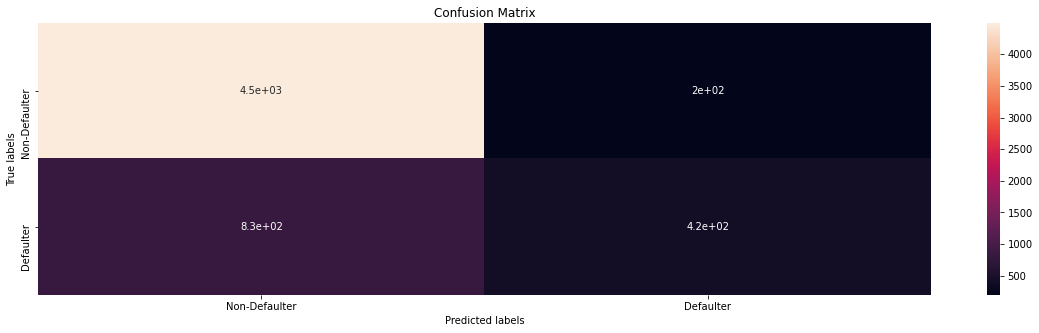

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.96      0.90      4692
    Defaulter       0.68      0.33      0.45      1248

     accuracy                           0.83      5940
    macro avg       0.76      0.65      0.67      5940
 weighted avg       0.81      0.83      0.80      5940

Epoch 1/10
1188/1188 [==============================] - 6s 2ms/step - loss: 0.4540 - accuracy: 0.8099 - val_loss: 0.4365 - val_accuracy: 0.8209
Epoch 2/10
1188/1188 [==============================] - 2s 2ms/step - loss: 0.4353 - accuracy: 0.8225 - val_loss: 0.4380 - val_accuracy: 0.8203
Epoch 3/10
1188/1188 [==============================] - 2s 2ms/step - loss: 0.4322 - accuracy: 0.8247 - val_loss: 0.4340 - val_accuracy: 0.8213
Epoch 4/10
1188/1188 [==============================] - 2s 2ms/step - loss: 0.4289 - accuracy: 0.8246 - val_loss: 0.4360 - val_accuracy: 0.8205
Epoch 5/10
1188/1188 [==============================] - 2s 2ms/step - loss: 0.4256 - accura

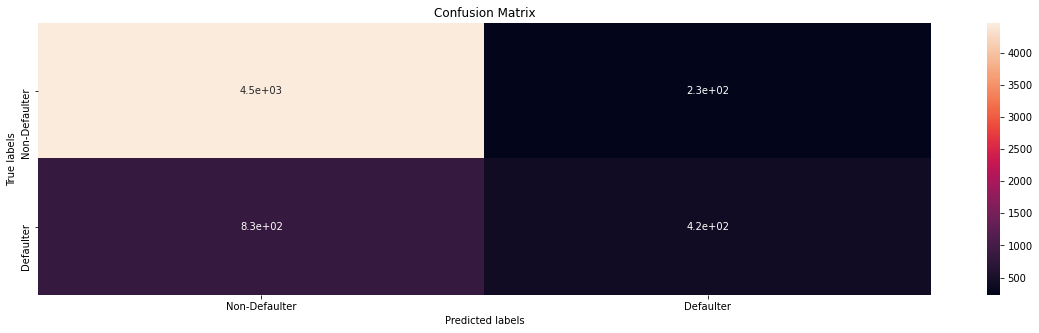

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.95      0.89      4692
    Defaulter       0.65      0.34      0.44      1248

     accuracy                           0.82      5940
    macro avg       0.74      0.64      0.67      5940
 weighted avg       0.80      0.82      0.80      5940

The accuracy on train data is 82.16% and The accuracy on test data is 82.69% for model SVM


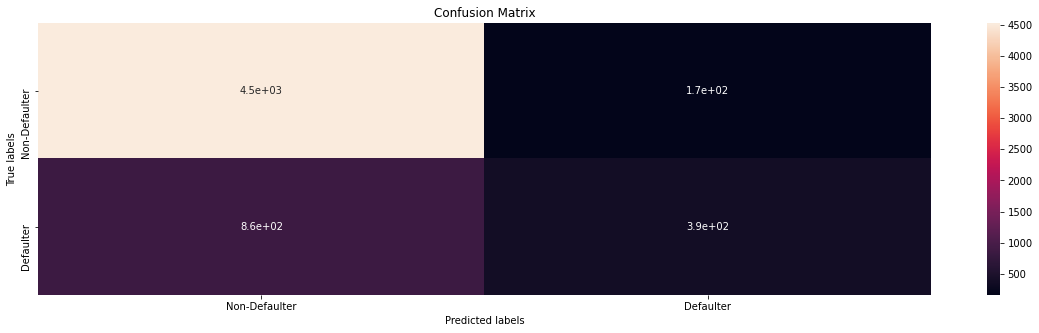

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.96      0.90      4692
    Defaulter       0.70      0.31      0.43      1248

     accuracy                           0.83      5940
    macro avg       0.77      0.64      0.66      5940
 weighted avg       0.81      0.83      0.80      5940



In [135]:
model3 = {LogisticRegression(fit_intercept=True, max_iter=10000)          : 'Logistic Model',
          Sequential([
                      Dense(32,input_dim=123,activation='relu'),   
                      Dense(32,activation='relu'),   
                      Dense(64,activation='relu'),       
                      Dense(2,activation='softmax')
          ])                                                              : 'Neural Network',
          SVC(kernel='linear')                                            : 'SVM'
          }
count=0
for model,name in model3.items():
  if count==1:
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])     #implementation for neural network is a bit different and thus i have created this conditional statement
    model.fit(X_train, y_train,epochs=10,batch_size=16,validation_split=0.2)
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
    train_class_preds = np.argmax(train_class_preds,axis=-1)
    test_class_preds = np.argmax(test_class_preds,axis=-1)
  else:
    model.fit(X_train, y_train)
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
  try:
    test_class_prob=model.predict_proba(X_test)
  except:
    pass
  train_accuracy = accuracy_score(train_class_preds,y_train)
  test_accuracy = accuracy_score(test_class_preds,y_test)
  if count==0:
    scoring = ['accuracy']
    scores = cross_validate(model,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,verbose = 5)
 
  
  
  print(Fore.BLUE +f"The accuracy on train data is {round(train_accuracy*100,2)}% and The accuracy on test data is {round(test_accuracy*100,2)}% for model {name}")
  labels = ['Non-Defaulter', 'Defaulter']
  cm_test = confusion_matrix(y_test, test_class_preds)
  fig, ax= plt.subplots(figsize=(20,5))
  sns.heatmap(cm_test, annot=True, ax = ax) 
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

  plt.show()
  print(Fore.RED+classification_report(y_test,test_class_preds,target_names=['Non-Defaulter', 'Defaulter'])+Fore.YELLOW)  
  count+=1


Again Recall is very low and thus i will be using the SMOTE on this transformed dataset aswell

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.886, test=0.884), total=   1.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ............. , accuracy=(train=0.886, test=0.886), total=   2.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV] ............. , accuracy=(train=0.886, test=0.885), total=   1.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.7s remaining:    0.0s


[CV] ............. , accuracy=(train=0.886, test=0.885), total=   1.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.6s remaining:    0.0s


[CV] ............. , accuracy=(train=0.886, test=0.884), total=   2.0s
The accuracy on train data is 88.61% and The accuracy on test data is 88.94% for model Logistic Model


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s finished


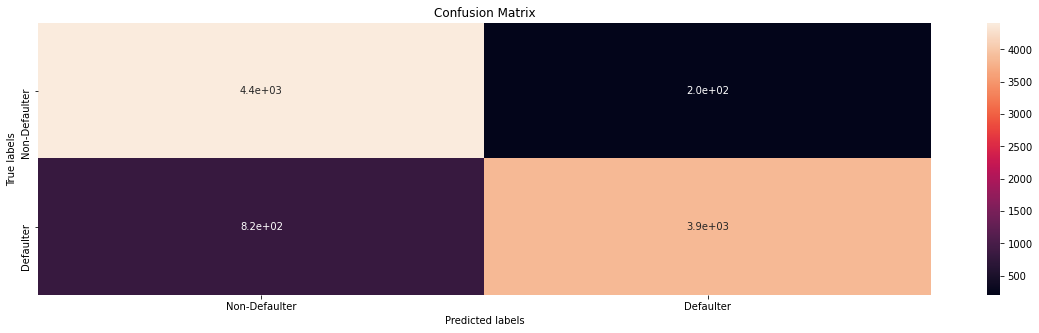

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.96      0.90      4613
    Defaulter       0.95      0.82      0.88      4689

     accuracy                           0.89      9302
    macro avg       0.90      0.89      0.89      9302
 weighted avg       0.90      0.89      0.89      9302

Epoch 1/10
2093/2093 [==============================] - 5s 2ms/step - loss: 0.3320 - accuracy: 0.8612 - val_loss: 0.2990 - val_accuracy: 0.8804
Epoch 2/10
2093/2093 [==============================] - 5s 2ms/step - loss: 0.2886 - accuracy: 0.8813 - val_loss: 0.2898 - val_accuracy: 0.8812
Epoch 3/10
2093/2093 [==============================] - 5s 2ms/step - loss: 0.2831 - accuracy: 0.8836 - val_loss: 0.2854 - val_accuracy: 0.8836
Epoch 4/10
2093/2093 [==============================] - 5s 2ms/step - loss: 0.2824 - accuracy: 0.8840 - val_loss: 0.2879 - val_accuracy: 0.8847
Epoch 5/10
2093/2093 [==============================] - 4s 2ms/step - loss: 0.2800 - accura

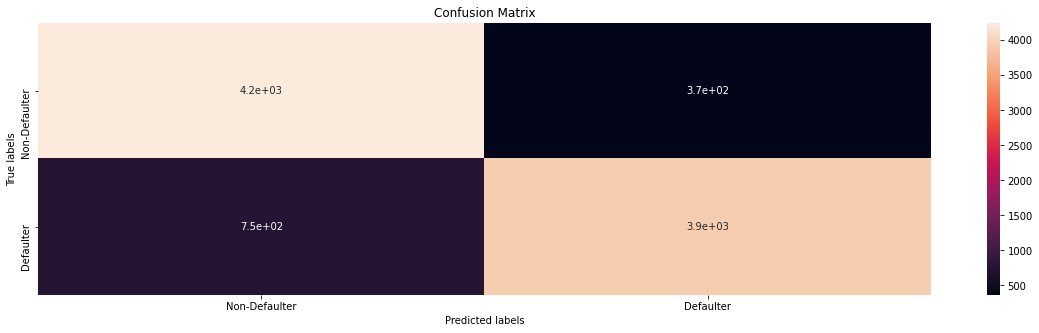

               precision    recall  f1-score   support

Non-Defaulter       0.85      0.92      0.88      4613
    Defaulter       0.91      0.84      0.88      4689

     accuracy                           0.88      9302
    macro avg       0.88      0.88      0.88      9302
 weighted avg       0.88      0.88      0.88      9302

The accuracy on train data is 88.58% and The accuracy on test data is 88.79% for model SVM


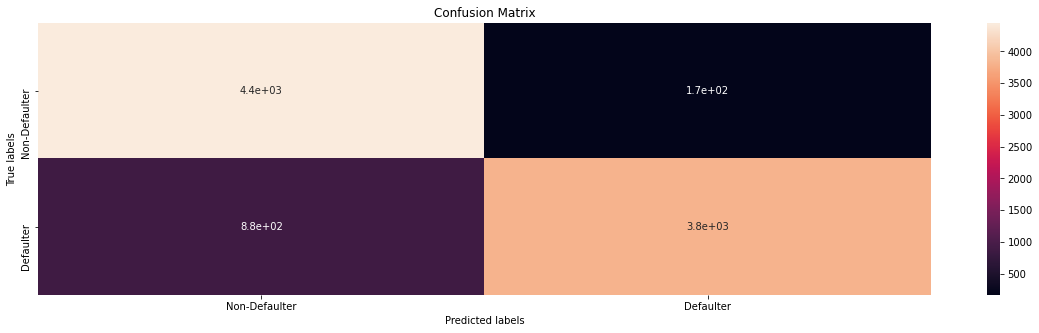

               precision    recall  f1-score   support

Non-Defaulter       0.84      0.96      0.90      4613
    Defaulter       0.96      0.81      0.88      4689

     accuracy                           0.89      9302
    macro avg       0.90      0.89      0.89      9302
 weighted avg       0.90      0.89      0.89      9302



In [150]:
oversample = SMOTE()                                                                              #usnig oversampling technique to create synthetic data and deal with class inbalance
X, y = oversample.fit_resample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=0)
'''------------------------------------------------------------------------------------------------------------Code Written Below is similar to what i have done above-------------------------------------------------------------'''
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model3 = {LogisticRegression(fit_intercept=True, max_iter=10000)          : 'Logistic Model',
          Sequential([
                      Dense(16,input_dim=123,activation='relu'),    
                      Dense(32,activation='relu'),  
                      Dense(64,activation='relu'),
                      Dense(128,activation='relu'),
                      Dense(2,activation='softmax')
          ])                                                              : 'Neural Network',
          SVC(kernel='linear')                                            : 'SVM'
          }
count=0
for model,name in model3.items():
  if count==1:
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])    #implementation for neural network is a bit different and thus i have created this conditional statement
    model.fit(X_train, y_train,epochs=10,batch_size=16,validation_split=0.1)
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
    train_class_preds = np.argmax(train_class_preds,axis=-1)
    test_class_preds = np.argmax(test_class_preds,axis=-1)
  else:
    model.fit(X_train, y_train)
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
  if count==0:                                                                                     #Saving info of linear model for further analysis
    test_class_prob_linear=model.predict_proba(X_test)
    train_class_preds_linear = model.predict(X_train)
    test_class_preds_linear = model.predict(X_test)
  train_accuracy = accuracy_score(train_class_preds,y_train)
  test_accuracy = accuracy_score(test_class_preds,y_test)
  if count==0:
    scoring = ['accuracy']
    scores = cross_validate(model,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,verbose = 5)
 
  
  from colorama import Fore
  print(Fore.BLUE +f"The accuracy on train data is {round(train_accuracy*100,2)}% and The accuracy on test data is {round(test_accuracy*100,2)}% for model {name}")
  labels = ['Non-Defaulter', 'Defaulter']
  cm_test = confusion_matrix(y_test, test_class_preds)
  fig, ax= plt.subplots(figsize=(20,5))
  sns.heatmap(cm_test, annot=True, ax = ax) 
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

  plt.show()
  print(Fore.RED+classification_report(y_test,test_class_preds,target_names=['Non-Defaulter', 'Defaulter'])+Fore.YELLOW)
  
  count+=1


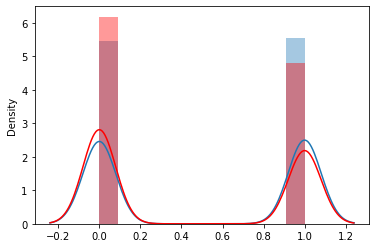

In [180]:
sns.distplot(x=y_test)
sns.distplot(x=test_class_preds_linear,color='red')

Linear Regression, Neural Network and SVM performed Equally Good with arounf 89% precision and recall, and thus accuracy as well.

#Ks_chart

In [155]:
max_p=[]
for i in range(len(test_class_prob_linear)):                        
  max_p.append(max(test_class_prob_linear[i]))
ks_chart=pd.DataFrame(max_p,columns=['p'])
ks_chart['y']=test_class_preds_linear

In [156]:
ks_chart.head()

,p,y
0,0.684716,0
1,0.910022,0
2,0.999993,1
3,0.999992,1
4,0.943146,0


In [197]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    print(Fore.RED+"KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [198]:
mydf = ks(data=ks_chart,target="y", prob="p")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.999997  1.000000     931          0     22.87%         0.00%   
2       0.999941  0.999997     930          0     22.85%         0.00%   
3       0.998595  0.999940     929          1     22.83%         0.02%   
4       0.935319  0.998587     536        394     13.17%         7.53%   
5       0.893799  0.935260      35        895      0.86%        17.11%   
6       0.868299  0.893789      34        896      0.84%        17.13%   
7       0.845118  0.868280      46        884      1.13%        16.90%   
8       0.809964  0.845072      65        865      1.60%        16.53%   
9       0.715946  0.809885     148        782      3.64%        14.95%   
10      0.500182  0.715765     416        515     10.22%         9.84%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             22.87

Really Great!! we can definately differentiate between the both classes our Final Model will be the most Linear Regression Model as it surpasses every other model despite to being the most basic model